#### 코드 참조
[1] https://github.com/rickiepark/machine-learning-with-python-cookbook
[2] https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html
[3] https://github.com/mikexcohen/LinAlgBook/blob/main/python
[4] https://docs.sympy.org/latest/tutorial/matrices.html
[5] Dr. Jaewook Lee's Lecture Notes

<a href="https://colab.research.google.com/github/SLCFLAB/Fintech2024/blob/main/ML_day0/0_2_linear_equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2장 선형방정식

## 2.1 행렬의 랭크 구하기

In [1]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
A = np.array([[1, 1, 1],
                   [1, 1, 10],
                   [1, 1, 15]])

# 행렬의 랭크를 반환합니다.
np.linalg.matrix_rank(A)

2

In [3]:
np.ndim(A)

2

In [7]:
# svd 함수로 특잇값만 계산합니다.
s = np.linalg.svd(A, compute_uv=False)

In [8]:
s

array([18.17059831,  1.35253727,  0.        ])

## 2.2 행렬식(determinant)과 norm 계산하기

In [9]:
# 라이브러리를 임포트합니다.
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

# 행렬을 만듭니다.
A = np.array([[1, 3, 5],
              [2, 5, 1],
              [2, 3, 8]])

# 행렬의 행렬식을 반환합니다.
linalg.det(A)

-25.000000000000004

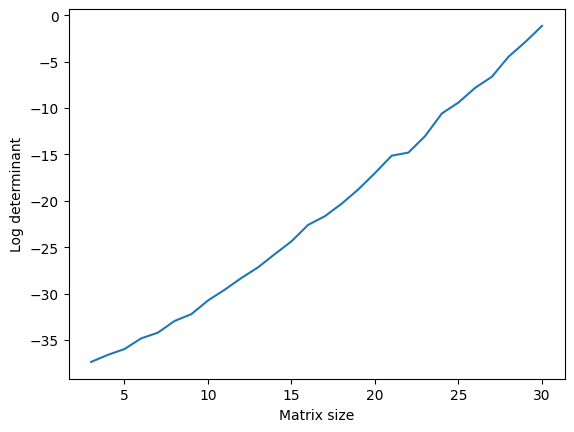

In [10]:
# matrix sizes
ns = np.arange(3,31)

# iteration
iters = 100

# initialize
dets = np.zeros((len(ns),iters))

# loop over matrix sizes
for ni in range(len(ns)):
    for i in range(iters):

        # step 1
        A = np.random.randn(ns[ni],ns[ni])

        # step 2
        A[:,0] = A[:,1]

        # step 3
        dets[ni,i]=np.abs(np.linalg.det(A))


# plotting
plt.plot(ns,np.log(np.mean(dets,axis=1)))
plt.xlabel('Matrix size')
plt.ylabel('Log determinant')
plt.show()

In [11]:
linalg.norm(A)

29.837859106810033

In [12]:
linalg.norm(A,'fro') # frobenius norm is the default

29.837859106810033

In [13]:
linalg.norm(A,1) # L1 norm (max column sum)

30.24708264497847

In [14]:
linalg.norm(A,-1) # min column sum

19.447770149589623

In [15]:
linalg.norm(A,np.inf) # L inf norm (max row sum)

29.852643969214263

## 2.3 행렬의 대각 원소 추출하기

In [34]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [2, 4, 6],
                   [3, 8, 9]])

# 대각 원소를 반환합니다.
matrix.diagonal()

array([1, 4, 9])

### 붙임

In [35]:
# 반환된 배열을 변경하려면 복사해야 합니다.
a = matrix.diagonal().copy()

In [36]:
a = np.diag(matrix)
print(a)

[1 4 9]


In [37]:
# 1차원 배열이 주어지면 2차원 대각행렬을 만듭니다.
np.diag(a)

array([[1, 0, 0],
       [0, 4, 0],
       [0, 0, 9]])

## 2.4 행렬의 대각합(trace) 계산

In [38]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [2, 4, 6],
                   [3, 8, 9]])

# 대각합을 반환합니다.
matrix.trace()

14

In [39]:
# 대각 원소를 사용하여 합을 구합니다.
sum(matrix.diagonal())

14

## 2.5 점곱 계산

In [40]:
# 라이브러리를 임포트합니다.
import numpy as np

# 두 벡터를 만듭니다.
vector_a = np.array([1,2,3])
vector_b = np.array([4,5,6])

# 점곱을 계산합니다.
np.dot(vector_a, vector_b)

32

### 붙임

In [41]:
scalar_a = np.array(1)
scalar_b = np.array(2)

In [42]:
np.dot(scalar_a, scalar_b)

2

In [43]:
# 스칼라 배열에 적용되지 않습니다.
scalar_a @ scalar_b

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

## 2.6 행렬 덧셈과 뺄셈

In [44]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix_a = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 2]])

# 행렬을 만듭니다.
matrix_b = np.array([[1, 3, 1],
                     [1, 3, 1],
                     [1, 3, 8]])

# 두 행렬을 더합니다.
np.add(matrix_a, matrix_b)

array([[ 2,  4,  2],
       [ 2,  4,  2],
       [ 2,  4, 10]])

In [45]:
# 두 행렬을 뺍니다.
np.subtract(matrix_a, matrix_b)

array([[ 0, -2,  0],
       [ 0, -2,  0],
       [ 0, -2, -6]])

In [46]:
# 두 행렬을 더합니다.
matrix_a + matrix_b

array([[ 2,  4,  2],
       [ 2,  4,  2],
       [ 2,  4, 10]])

## 2.7 행렬 곱셈

In [47]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix_a = np.array([[1, 1],
                     [1, 2]])

# 행렬을 만듭니다.
matrix_b = np.array([[1, 3],
                     [1, 2]])

# 두 행렬을 곱합니다.
np.dot(matrix_a, matrix_b)

array([[2, 5],
       [3, 7]])

In [48]:
# 두 행렬을 곱합니다.
matrix_a @ matrix_b

array([[2, 5],
       [3, 7]])

In [49]:
# 두 행렬의 원소별 곱셈을 수행합니다.
matrix_a * matrix_b

array([[1, 3],
       [1, 4]])

##  2.8 선형방정식과 LU 분해

In [16]:
# 라이브러리를 임포트합니다.
import numpy as np
from scipy.linalg import lu

A = np.array([[1,3,5],[2,5,1],[2,3,8]])

In [17]:
# LU 분해합니다.
P, L, U = lu(A)
np.allclose(A - P @ L @ U, np.zeros((3, 3)))
print(P)
print(L),
print(U)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[ 1.    0.    0.  ]
 [ 1.    1.    0.  ]
 [ 0.5  -0.25  1.  ]]
[[ 2.    5.    1.  ]
 [ 0.   -2.    7.  ]
 [ 0.    0.    6.25]]


In [18]:
b = np.array([[10], [8], [3]])
y=np.linalg.solve(L, P.T@ b)
y

array([[ 8.  ],
       [-5.  ],
       [ 4.75]])

In [19]:
x=np.linalg.solve(U, y)
x

array([[-9.28],
       [ 5.16],
       [ 0.76]])

## 2.9 역행렬 구하기, 연립방정식 풀기

In [20]:
import numpy as np
from scipy import linalg
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
A

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [21]:
linalg.inv(A)

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

In [22]:
A.dot(linalg.inv(A)) #double check

array([[ 1.00000000e+00, -1.11022302e-16,  4.85722573e-17],
       [ 3.05311332e-16,  1.00000000e+00,  7.63278329e-17],
       [ 2.22044605e-16, -1.11022302e-16,  1.00000000e+00]])

In [23]:
# 행렬과 역행렬을 곱합니다.
A @ np.linalg.inv(A)

array([[ 1.00000000e+00,  1.11022302e-16, -6.24500451e-17],
       [-1.38777878e-16,  1.00000000e+00, -1.45716772e-16],
       [-2.22044605e-16,  0.00000000e+00,  1.00000000e+00]])

In [24]:
b = np.array([[10], [8], [3]])
b

array([[10],
       [ 8],
       [ 3]])

In [25]:
linalg.inv(A).dot(b)  # slow

array([[-9.28],
       [ 5.16],
       [ 0.76]])

In [26]:
A.dot(linalg.inv(A).dot(b)) - b  # check

array([[ 0.00000000e+00],
       [-1.77635684e-15],
       [-8.88178420e-16]])

In [27]:
np.linalg.solve(A, b)  # fast

array([[-9.28],
       [ 5.16],
       [ 0.76]])

In [28]:
A.dot(np.linalg.solve(A, b)) - b  # check

array([[ 0.00000000e+00],
       [-1.77635684e-15],
       [-1.77635684e-15]])

In [29]:
import numpy as np
from scipy.linalg import lu
import sympy as sym

A = np.array([[1,1, 2, -1],[4, 3, 6, -5],[-1, -2, -4, 0]])
A

array([[ 1,  1,  2, -1],
       [ 4,  3,  6, -5],
       [-1, -2, -4,  0]])

In [30]:
b = np.array([[-1], [-4], [1]])
b

array([[-1],
       [-4],
       [ 1]])

In [31]:
# LU 분해합니다.
P, L, U = lu(A)
print(P)
print(L),
print(U)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[ 1.    0.    0.  ]
 [-0.25  1.    0.  ]
 [ 0.25 -0.2   1.  ]]
[[ 4.    3.    6.   -5.  ]
 [ 0.   -1.25 -2.5  -1.25]
 [ 0.    0.    0.    0.  ]]


In [32]:
# 기약사다리꼴(rref)에서 pivot 위치 보여주기
# transform to sympy matrix for RREF
sym.Matrix(A).rref()

(Matrix([
 [1, 0, 0, -2],
 [0, 1, 2,  1],
 [0, 0, 0,  0]]),
 (0, 1))

In [33]:
# 기약사다리꼴(rref) 행렬을 심볼릭하게 보여주기
sym.Matrix(A).rref()[0]

Matrix([
[1, 0, 0, -2],
[0, 1, 2,  1],
[0, 0, 0,  0]])